In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.ndimage import gaussian_filter

In [2]:
mass_vector=[0.001,0.0011,0.0013,0.0016,0.0020,0.0025,0.0030,0.0035,0.0040,0.0050,0.007,0.010,0.02,0.04,0.06,0.08,0.10,0.12,0.14,0.16,0.18,0.20,0.22,0.25,0.27,0.29,0.31,0.33,0.35,0.37,0.39,0.41,0.43,0.45,0.47,0.49,0.51,0.53,0.55,0.57,0.59,0.61,0.63,0.65,0.67,0.69,0.71,0.73,0.75,0.77,0.79,0.81,0.83,0.85,0.87,0.89,0.91,0.93,0.95,0.97,0.99,1.01,1.03,1.05,1.07,1.09,1.11,1.13,1.15,1.17,1.19,1.21,1.23,1.25,1.27,1.29,1.31,1.33,1.35,1.37,1.39,1.41,1.43,1.45,1.47,1.49,1.51,1.53]
mass_vector=np.array(mass_vector)
        

In [3]:
eps_vector= np.arange(-3.0, -9.1, -0.3) 
eps_vector=np.round(eps_vector,1)
logeps_vector=np.array([pow(10,eps) for eps in eps_vector])

for eps in eps_vector:
    print(eps)

-3.0
-3.3
-3.6
-3.9
-4.2
-4.5
-4.8
-5.1
-5.4
-5.7
-6.0
-6.3
-6.6
-6.9
-7.2
-7.5
-7.8
-8.1
-8.4
-8.7
-9.0


In [4]:
M,E=np.meshgrid(mass_vector,eps_vector)
M,logE=np.meshgrid(mass_vector,logeps_vector)

In [5]:
Sigma=0.3
M.shape

(21, 88)

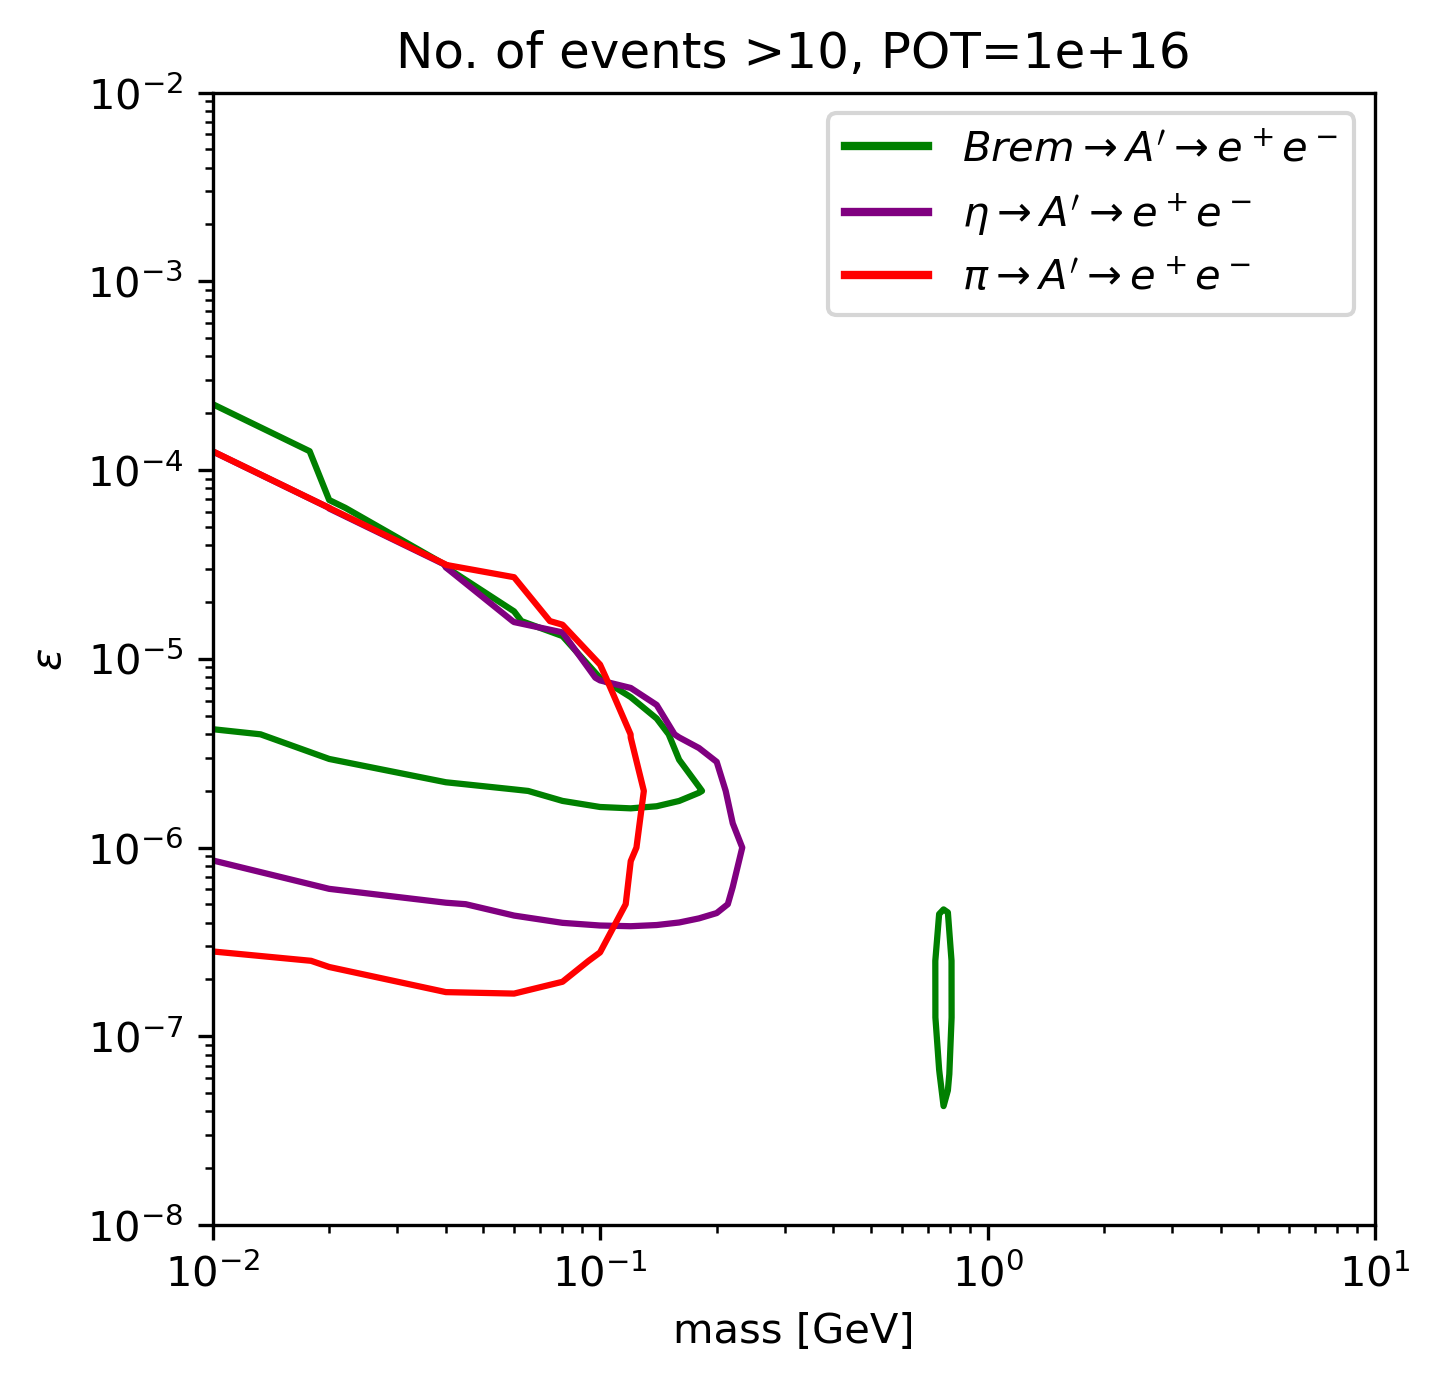

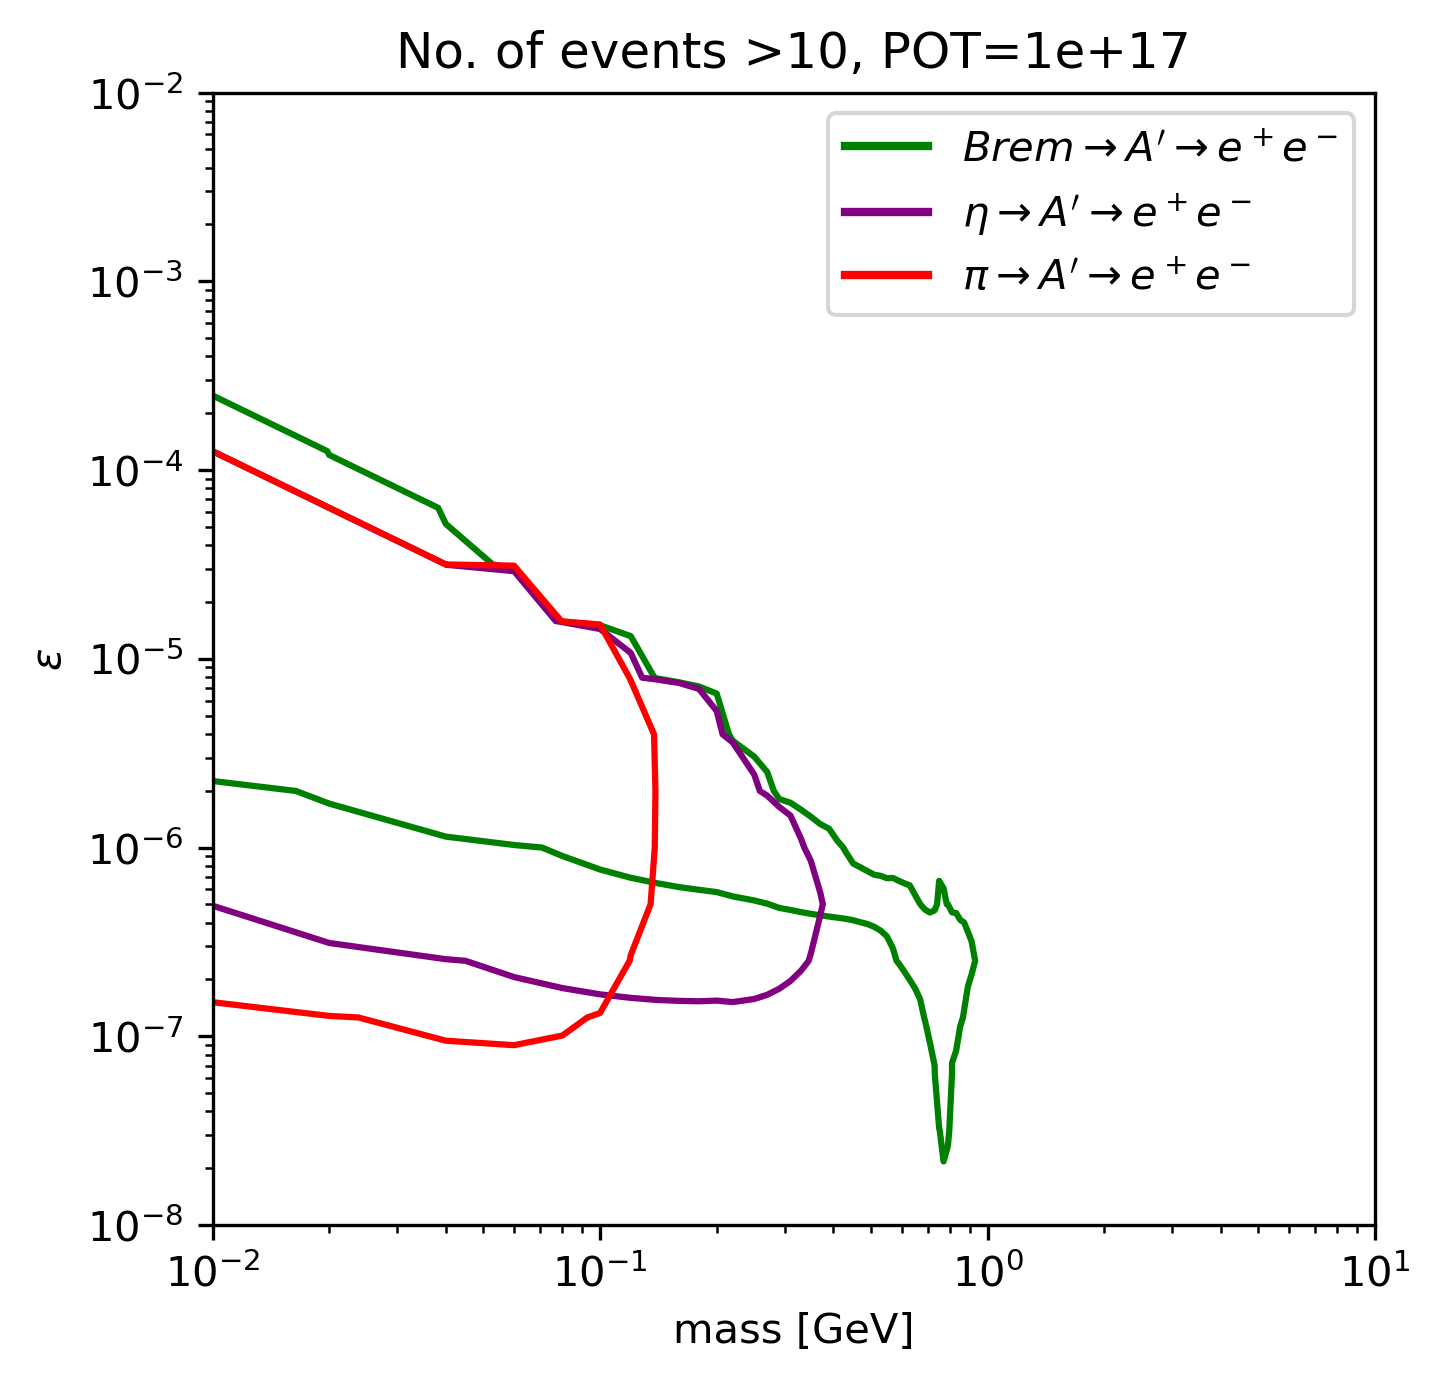

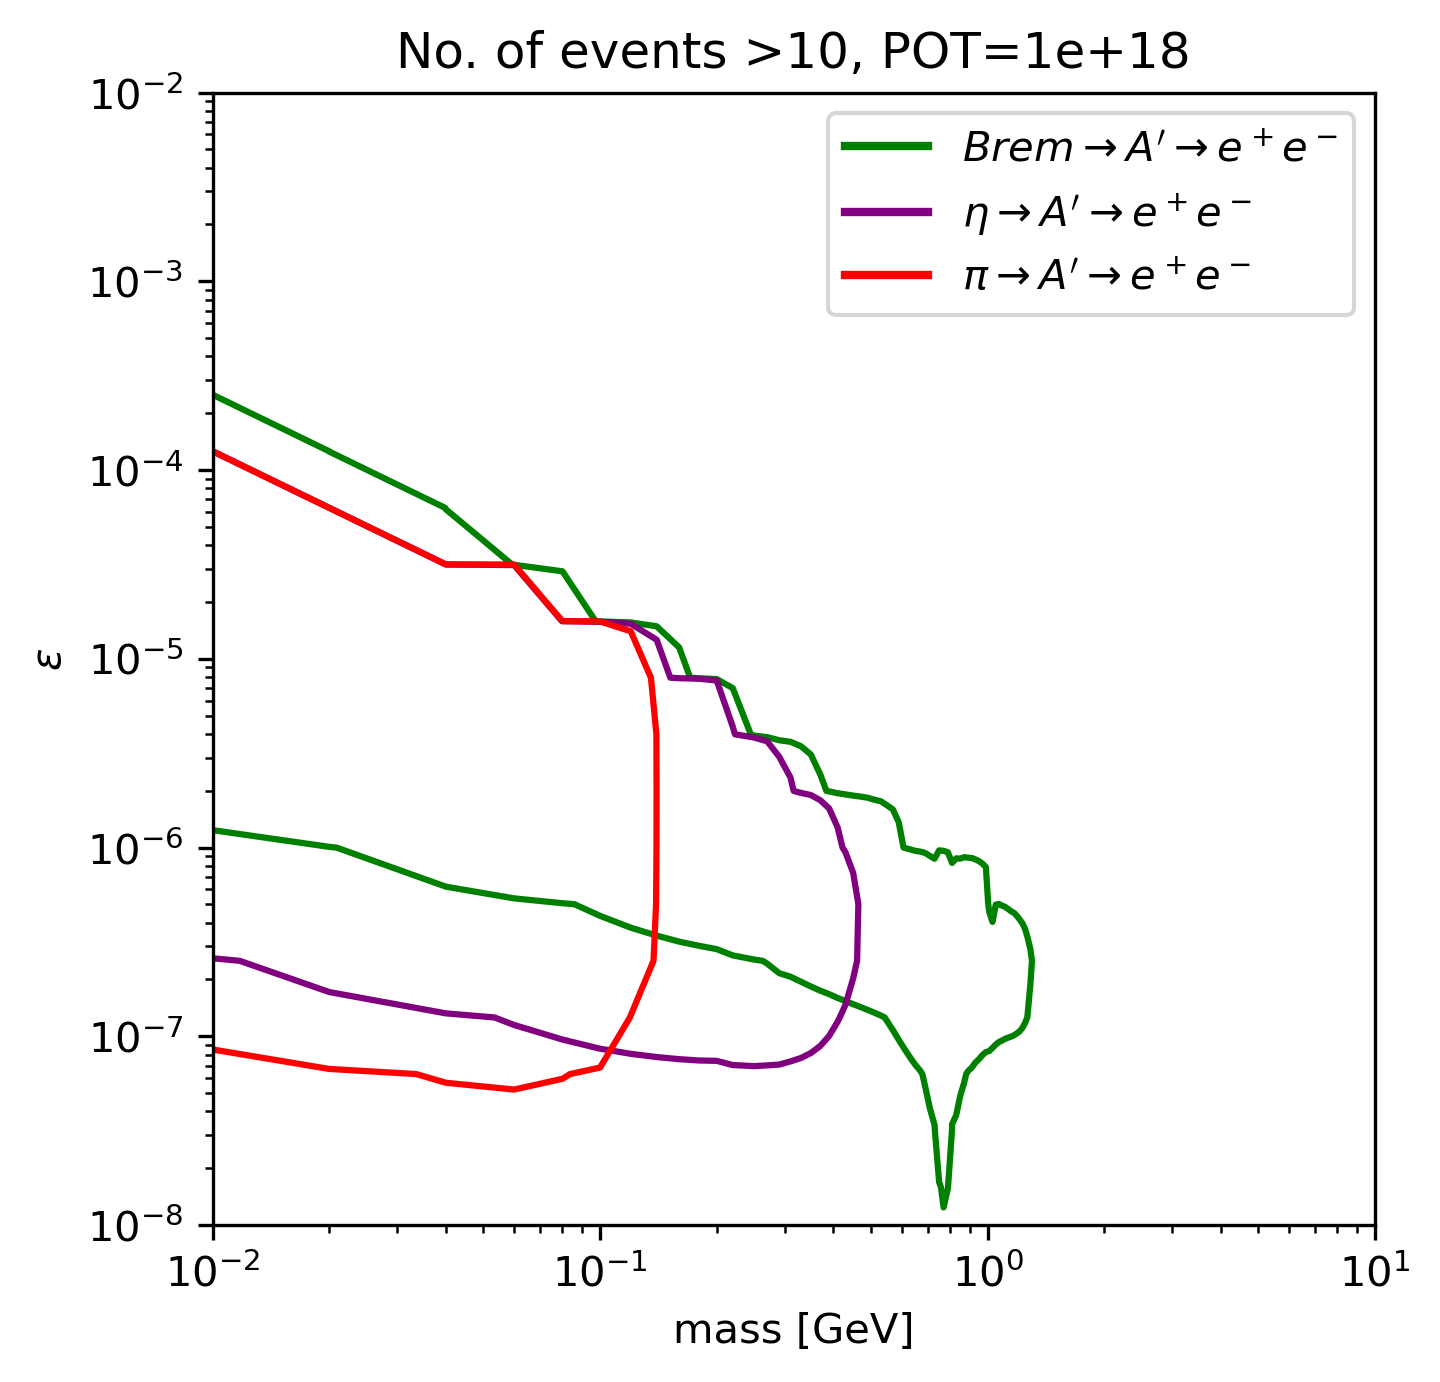

In [7]:
Nevts_brem_muon=[np.zeros_like(M),np.zeros_like(M),np.zeros_like(M)]
Nevts_brem_electron=[np.zeros_like(M),np.zeros_like(M),np.zeros_like(M)]
Nevts_eta_muon=[np.zeros_like(M),np.zeros_like(M),np.zeros_like(M)]
Nevts_eta_electron=[np.zeros_like(M),np.zeros_like(M),np.zeros_like(M)]
Nevts_pion_electron=[np.zeros_like(M),np.zeros_like(M),np.zeros_like(M)]
Nevts_all=[np.zeros_like(M),np.zeros_like(M),np.zeros_like(M)]
POTs=[16,17,18]
for i in range(3):
    POT=POTs[i]
    input_file=f"Nevts (Brem → A' → muons)_Brem_muons_1e+{str(POT)}.txt"
    with open(input_file,"r") as file:
        for line in file:
            line=line.strip()
            line_vars=line.split()
            ind_mass=np.where(mass_vector==float(line_vars[0]))
            ind_eps=np.where(eps_vector==round(np.log10(float(line_vars[1])),1))
            if line_vars[2][0]=="[":
                value=float(line_vars[2].strip("[]"))
            else:
                value=float(line_vars[2])
            #print(float(line_vars[0]))
            #print(ind_mass[0])
            #print(round(np.log10(float(line_vars[1])),1))
            #print(ind_eps[0])
            #print(value)
            if np.isfinite(value):
                Nevts_brem_muon[i][ind_eps[0],ind_mass[0]]=value
            #if value>Nevts_all[i][ind_eps[0],ind_mass[0]]:
            #    Nevts_all[i][ind_eps[0],ind_mass[0]]=value
                
    input_file=f"Nevts (Brem → A' → electrons)_Brem_electrons_1e+{str(POT)}.txt"
    with open(input_file,"r") as file:
        for line in file:
            line=line.strip()
            line_vars=line.split()
            ind_mass=np.where(mass_vector==float(line_vars[0]))
            ind_eps=np.where(eps_vector==round(np.log10(float(line_vars[1])),1))
            if line_vars[2][0]=="[":
                value=float(line_vars[2].strip("[]"))
            else:
                value=float(line_vars[2])
            #print(float(line_vars[0]))
            #print(ind_mass[0])
            #print(round(np.log10(float(line_vars[1])),1))
            #print(ind_eps[0])
            #print(value)
            if np.isfinite(value):
                Nevts_brem_electron[i][ind_eps[0],ind_mass[0]]=value
            #if value>Nevts_all[i][ind_eps[0],ind_mass[0]]:
            #    Nevts_all[i][ind_eps[0],ind_mass[0]]=value
            
                
    input_file=f"Nevts (Eta → A' → muons)_Eta_muons_1e+{str(POT)}.txt"
    with open(input_file,"r") as file:
        for line in file:
            line=line.strip()
            line_vars=line.split()
            ind_mass=np.where(mass_vector==float(line_vars[0]))
            ind_eps=np.where(eps_vector==round(np.log10(float(line_vars[1])),1))
            if line_vars[2][0]=="[":
                value=float(line_vars[2].strip("[]"))
            else:
                value=float(line_vars[2])
            #print(float(line_vars[0]))
            #print(ind_mass[0])
            #print(round(np.log10(float(line_vars[1])),1))
            #print(ind_eps[0])
            #print(value)
            Nevts_eta_muon[i][ind_eps[0],ind_mass[0]]=value
            #if value>Nevts_all[i][ind_eps[0],ind_mass[0]]:
            #    Nevts_all[i][ind_eps[0],ind_mass[0]]=value

    input_file=f"Nevts (Eta → A' → electrons)_Eta_electrons_1e+{str(POT)}.txt"
    with open(input_file,"r") as file:
        for line in file:
            line=line.strip()
            line_vars=line.split()
            ind_mass=np.where(mass_vector==float(line_vars[0]))
            ind_eps=np.where(eps_vector==round(np.log10(float(line_vars[1])),1))
            if line_vars[2][0]=="[":
                value=float(line_vars[2].strip("[]"))
            else:
                value=float(line_vars[2])
            #print(float(line_vars[0]))
            #print(ind_mass[0])
            #print(round(np.log10(float(line_vars[1])),1))
            #print(ind_eps[0])
            #print(value)
            Nevts_eta_electron[i][ind_eps[0],ind_mass[0]]=value
            #if value>Nevts_all[i][ind_eps[0],ind_mass[0]]:
            #    Nevts_all[i][ind_eps[0],ind_mass[0]]=value

    input_file=f"Nevts (Pion → A' → electrons)_Pion_electrons_1e+{str(POT)}.txt"
    with open(input_file,"r") as file:
        for line in file:
            line=line.strip()
            line_vars=line.split()
            ind_mass=np.where(mass_vector==float(line_vars[0]))
            ind_eps=np.where(eps_vector==round(np.log10(float(line_vars[1])),1))
            if line_vars[2][0]=="[":
                value=float(line_vars[2].strip("[]"))
            else:
                value=float(line_vars[2])
            #print(float(line_vars[0]))
            #print(ind_mass[0])
            #print(round(np.log10(float(line_vars[1])),1))
            #print(ind_eps[0])
            #print(value)
            Nevts_pion_electron[i][ind_eps[0],ind_mass[0]]=value
            #if value>Nevts_all[i][ind_eps[0],ind_mass[0]]:
            #    Nevts_all[i][ind_eps[0],ind_mass[0]]=value
    #Nevts_brem_electron[i]=gaussian_filter(Nevts_brem_electron[i],sigma=Sigma)
    #Nevts_brem_muon[i]=gaussian_filter(Nevts_brem_muon[i],sigma=Sigma)
    #Nevts_eta_electron[i]=gaussian_filter(Nevts_eta_electron[i],sigma=Sigma)
    #Nevts_eta_muon[i]=gaussian_filter(Nevts_eta_muon[i],sigma=Sigma)
    #Nevts_pion_electron[i]=gaussian_filter(Nevts_pion_electron[i],sigma=Sigma)
    
    Nevts_all[i]=Nevts_brem_electron[i]+Nevts_eta_electron[i]+Nevts_pion_electron[i]
    fig=plt.figure(dpi=300,figsize=(5,5))
    ax = fig.add_subplot(1,1,1)
    #alllabels=["Brem \u2192 A' \u2192 muons","Eta \u2192 A' \u2192 electrons","Eta \u2192 A' \u2192 muons","Pion \u2192 A' \u2192 electrons"]
    alllabels=[r'$Brem \to A^{\prime} \to e^+e^-$',r'$Brem \to A^{\prime} \to \mu^+\mu^-$',r'$\eta \to A^{\prime} \to e^+e^-$',r'$\eta \to A^{\prime} \to \mu^+\mu^-$',r'$\pi \to A^{\prime} \to e^+e^-$']
    allcolors=["green","black","purple","blue","red"]
    #Nevts_brem_muon = gaussian_filter(Nevts_brem_muon, sigma=0.6)
    #co0=ax.tricontour(np.ravel(M),np.ravel(E),np.ravel(Nevts_brem_muon),levels=[10],colors=allcolors[0])
    co0=ax.contour(M,logE,Nevts_brem_electron[i],levels=[10],colors=allcolors[0])
    #co00=ax.contour(M,logE,Nevts_brem_muon[i],levels=[10],colors=allcolors[1])
    co2=ax.contour(M,logE,Nevts_eta_electron[i],levels=[10],colors=allcolors[2])
    #co1=ax.contour(M,logE,Nevts_eta_muon[i],levels=[10],colors=allcolors[3])
    co3=ax.contour(M,logE,Nevts_pion_electron[i],levels=[10],colors=allcolors[4])
    legend_handles=[]
    #for i in range(5):
    #    legend_handles.append(Line2D([0], [0], color=allcolors[i], lw=2, label=alllabels[i]))
    legend_handles.append(Line2D([0], [0], color=allcolors[0], lw=2, label=alllabels[0]))
    legend_handles.append(Line2D([0], [0], color=allcolors[2], lw=2, label=alllabels[2]))
    legend_handles.append(Line2D([0], [0], color=allcolors[4], lw=2, label=alllabels[4]))
    
    ax.legend(handles=legend_handles)
    ax.set_xlim(0.01,10)
    ax.set_ylim(pow(10,-8),pow(10,-2))
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("mass [GeV]")
    ax.set_ylabel(r"$\epsilon$")
    ax.set_title(f"No. of events >10, POT=1e+{str(POT)}")
    fig.savefig(f"reach_curve_{str(POT)}.pdf")

/tmp/ipykernel_4171329/1489236759.py:11: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  curves.append(co.allsegs)


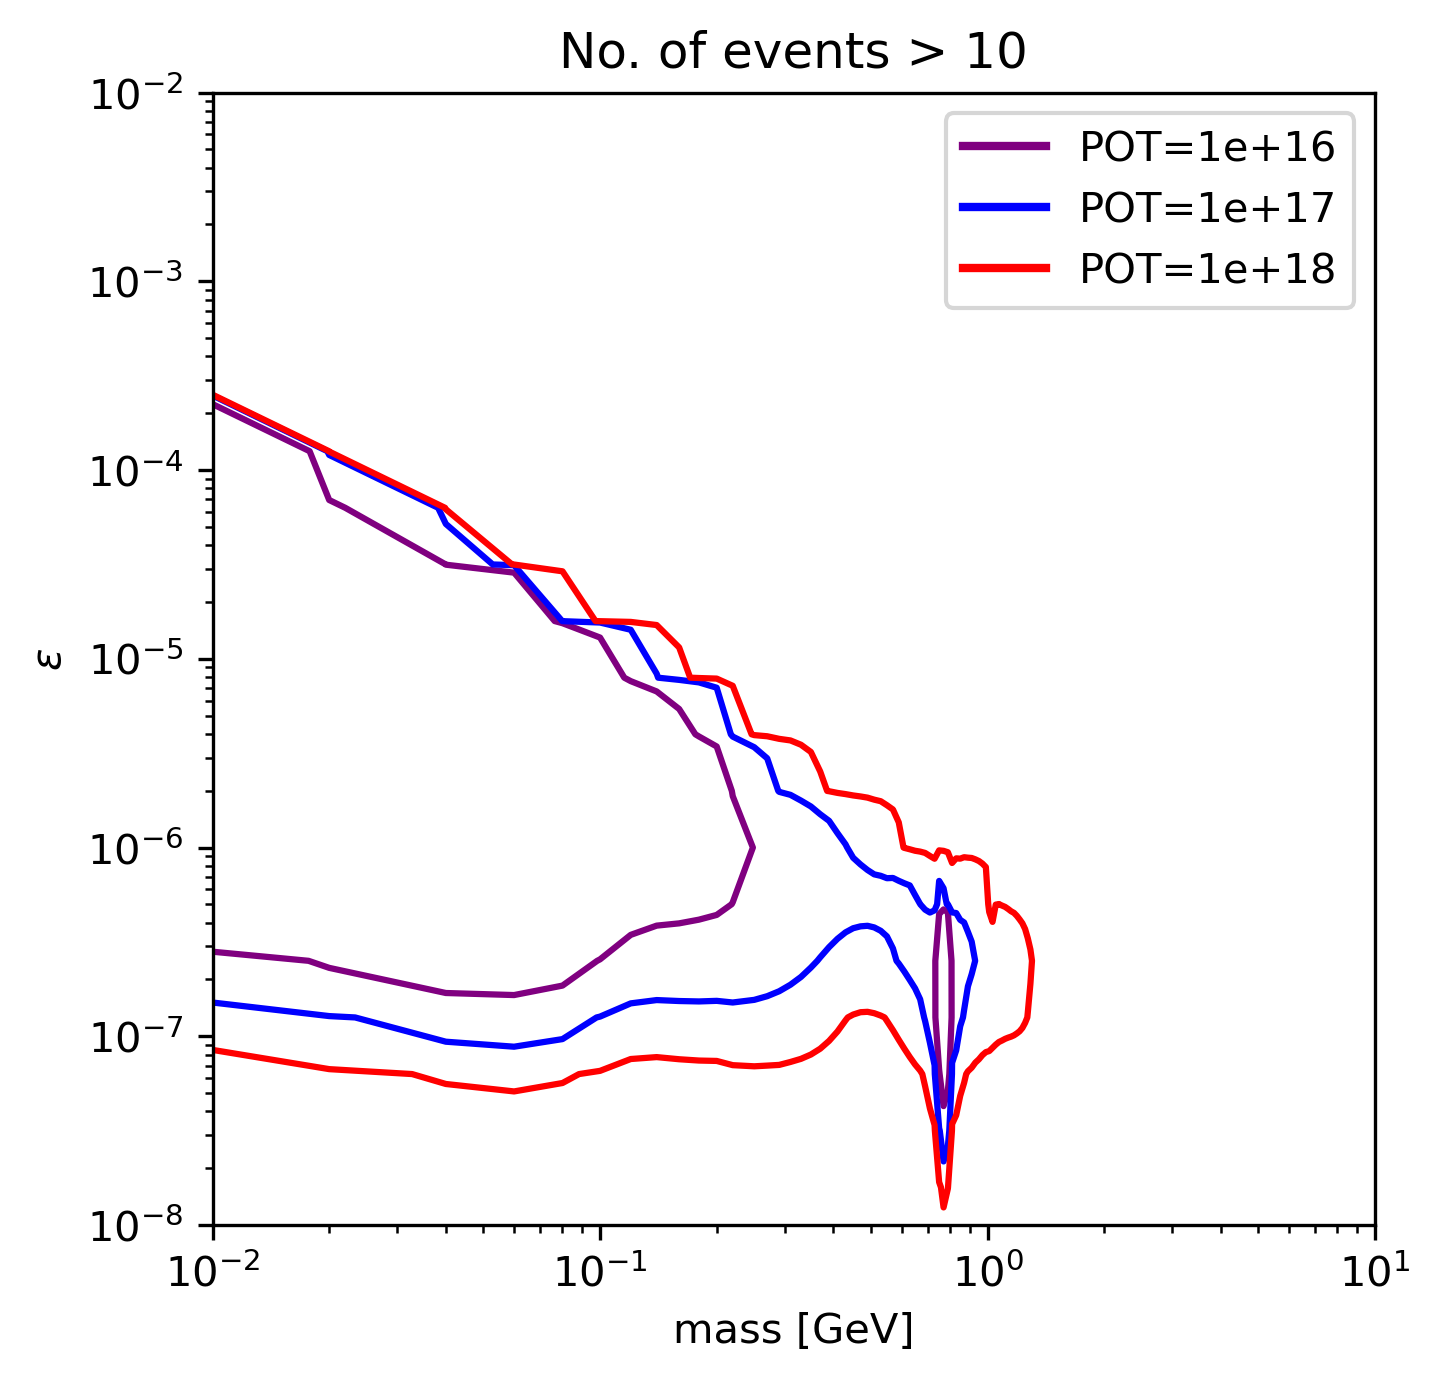

In [9]:
fig=plt.figure(dpi=300,figsize=(5,5))
ax = fig.add_subplot(1,1,1)
alllabels=["POT=1e+16","POT=1e+17","POT=1e+18"]
allcolors=["purple","blue","red"]
legend_handles=[]
curves=[]
for i in range(3):
    tmp=Nevts_all[i]
    #tmp=gaussian_filter(Nevts_all[i],sigma=0.5)
    co=ax.contour(M,logE,tmp,levels=[10],colors=allcolors[i])
    curves.append(co.allsegs)
    legend_handles.append(Line2D([0], [0], color=allcolors[i], lw=2, label=alllabels[i]))
ax.legend(handles=legend_handles)
ax.set_xlim(0.01,10)
ax.set_ylim(pow(10,-8),pow(10,-2))
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("mass [GeV]")
ax.set_ylabel(r"$\epsilon$")
ax.set_title("No. of events > 10")
fig.savefig("reach_curve.pdf")

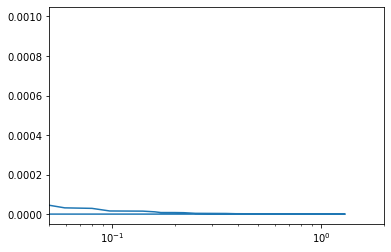

In [10]:
len(curves[0])
#curves[0][1]
#A=[row[0] for row in curves[0]]
#A
#curves[0]
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(curves[2][0][:,0],curves[2][0][:,1])
ax.set_xlim(0.05,2)
ax.set_xscale("log")
with open ("xinlong16z33.dat","w") as file:
    for p in curves[0][0]:
        file.write(f"{str(p[0])} {str(p[1])}\n")
with open ("xinlong17z33.dat","w") as file:
    for p in curves[1][0]:
        file.write(f"{str(p[0])} {str(p[1])}\n")
with open ("xinlong18z33.dat","w") as file:
    for p in curves[2][0]:
        file.write(f"{str(p[0])} {str(p[1])}\n")
with open ("test.dat","w") as file:
    for p in curves[2][0]:
        file.write(f"{str(p[0])} {str(p[1])}\n")

In [8]:
import matplotlib.colors
Eff_brem_muon=[np.zeros_like(M),np.zeros_like(M),np.zeros_like(M)]
Eff_brem_electron=[np.zeros_like(M),np.zeros_like(M),np.zeros_like(M)]
Eff_eta_muon=[np.zeros_like(M),np.zeros_like(M),np.zeros_like(M)]
Eff_eta_electron=[np.zeros_like(M),np.zeros_like(M),np.zeros_like(M)]
Eff_pion_electron=[np.zeros_like(M),np.zeros_like(M),np.zeros_like(M)]
input_file=f"Brem_muons_eff.txt"
with open(input_file,"r") as file:
    for line in file:
        line=line.strip()
        line_vars=line.split()
        ind_mass=np.where(mass_vector==float(line_vars[0]))
        ind_eps=np.where(eps_vector==round(float(line_vars[1]),1))
        reco_value=float(line_vars[2])
        trig_value=float(line_vars[3])
        both_value=float(line_vars[4])
        #print(float(line_vars[0]))
        #print(ind_mass[0])
        #print(round(np.log10(float(line_vars[1])),1))
        #print(ind_eps[0])
        #print(value)
        Eff_brem_muon[0][ind_eps[0],ind_mass[0]]=reco_value
        Eff_brem_muon[1][ind_eps[0],ind_mass[0]]=trig_value
        Eff_brem_muon[2][ind_eps[0],ind_mass[0]]=both_value
    
input_file=f"Brem_electrons_eff.txt"
with open(input_file,"r") as file:
    for line in file:
        line=line.strip()
        line_vars=line.split()
        ind_mass=np.where(mass_vector==float(line_vars[0]))
        ind_eps=np.where(eps_vector==round(float(line_vars[1]),1))
        reco_value=float(line_vars[2])
        trig_value=float(line_vars[3])
        both_value=float(line_vars[4])
        #print(float(line_vars[0]))
        #print(ind_mass[0])
        #print(round(np.log10(float(line_vars[1])),1))
        #print(ind_eps[0])
        #print(value)
        Eff_brem_electron[0][ind_eps[0],ind_mass[0]]=reco_value
        Eff_brem_electron[1][ind_eps[0],ind_mass[0]]=trig_value
        Eff_brem_electron[2][ind_eps[0],ind_mass[0]]=both_value
        
input_file=f"Eta_muons_eff.txt"
with open(input_file,"r") as file:
    for line in file:
        line=line.strip()
        line_vars=line.split()
        #for x in line_vars:
        #    print(x)
        ind_mass=np.where(mass_vector==float(line_vars[0]))
        ind_eps=np.where(eps_vector==round(float(line_vars[1]),1))
        reco_value=float(line_vars[2])
        trig_value=float(line_vars[3])
        both_value=float(line_vars[4])
        #print(float(line_vars[0]))
        #print(ind_mass[0])
        #print(round(np.log10(float(line_vars[1])),1))
        #print(ind_eps[0])
        #print(reco_value)
        Eff_eta_muon[0][ind_eps[0],ind_mass[0]]=reco_value
        Eff_eta_muon[1][ind_eps[0],ind_mass[0]]=trig_value
        Eff_eta_muon[2][ind_eps[0],ind_mass[0]]=both_value
        
input_file=f"Eta_electrons_eff.txt"
with open(input_file,"r") as file:
    for line in file:
        line=line.strip()
        line_vars=line.split()
        ind_mass=np.where(mass_vector==float(line_vars[0]))
        ind_eps=np.where(eps_vector==round(float(line_vars[1]),1))
        reco_value=float(line_vars[2])
        trig_value=float(line_vars[3])
        both_value=float(line_vars[4])
        #print(float(line_vars[0]))
        #print(ind_mass[0])
        #print(round(np.log10(float(line_vars[1])),1))
        #print(ind_eps[0])
        #print(value)
        Eff_eta_electron[0][ind_eps[0],ind_mass[0]]=reco_value
        Eff_eta_electron[1][ind_eps[0],ind_mass[0]]=trig_value
        Eff_eta_electron[2][ind_eps[0],ind_mass[0]]=both_value
input_file=f"Pion_electrons_eff.txt"
with open(input_file,"r") as file:
    for line in file:
        line=line.strip()
        line_vars=line.split()
        ind_mass=np.where(mass_vector==float(line_vars[0]))
        ind_eps=np.where(eps_vector==round(float(line_vars[1]),1))
        reco_value=float(line_vars[2])
        trig_value=float(line_vars[3])
        both_value=float(line_vars[4])
        #print(float(line_vars[0]))
        #print(ind_mass[0])
        #print(round(np.log10(float(line_vars[1])),1))
        #print(ind_eps[0])
        #print(value)
        Eff_pion_electron[0][ind_eps[0],ind_mass[0]]=reco_value
        Eff_pion_electron[1][ind_eps[0],ind_mass[0]]=trig_value
        Eff_pion_electron[2][ind_eps[0],ind_mass[0]]=both_value
sc_mass=M.ravel()
sc_eps=E.ravel()
sc_Eff_brem_muon=[Eff_brem_muon[0].ravel(),Eff_brem_muon[1].ravel(),Eff_brem_muon[2].ravel()]
sc_Eff_brem_electron=[Eff_brem_electron[0].ravel(),Eff_brem_electron[1].ravel(),Eff_brem_electron[2].ravel()]
sc_Eff_eta_muon=[Eff_eta_muon[0].ravel(),Eff_eta_muon[1].ravel(),Eff_eta_muon[2].ravel()]
sc_Eff_eta_electron=[Eff_eta_electron[0].ravel(),Eff_eta_electron[1].ravel(),Eff_eta_electron[2].ravel()]
sc_Eff_pion_electron=[Eff_pion_electron[0].ravel(),Eff_pion_electron[1].ravel(),Eff_pion_electron[2].ravel()]
sc_Alleff=[sc_Eff_brem_muon, sc_Eff_brem_electron, sc_Eff_eta_muon, sc_Eff_eta_electron,sc_Eff_pion_electron]

#for x in sc_Eff_eta_muon[0]:
#    print(x)

sctype=["Reconstruction Efficiency","Trigger Efficiency","Combined Efficiency"]
scchannel=["Brem muons","Brem electrons","Eta muons","Eta electrons","Pion electrons"]
scchannel=[r'$Brem \to A^{\prime} \to \mu^+\mu^-$',r'$Brem \to A^{\prime} \to e^+e^-$',r'$\eta \to A^{\prime} \to \mu^+\mu^-$',r'$\eta \to A^{\prime} \to e^+e^-$',r'$\pi \to A^{\prime} \to e^+e^-$']
for i in range(5):
    for j in range(3):
        fig=plt.figure(dpi=100,figsize=(10,8))
        ax = fig.add_subplot(1,1,1)
        sc=ax.scatter(sc_mass, sc_eps, c=np.where(sc_Alleff[i][j]==0,np.nan,sc_Alleff[i][j]), cmap=matplotlib.cm.YlOrRd)
        fig.colorbar(sc,ax=ax)
        if i==0 or i==1:
            ax.set_xlim(0.1,1.5)
        elif i==2 or i==3:
            ax.set_xlim(0.01,0.6)
        else:
            ax.set_xlim(0.011,0.6)
        ax.set_title(f"{scchannel[i]} {sctype[j]}")
        ax.set_xlabel("mass [GeV]")
        ax.set_ylabel(r"$\mathrm{log}_{10}(\epsilon)$")
        fig.savefig(f"Eff_{scchannel[i]}_{sctype[j]}.pdf")

FileNotFoundError: [Errno 2] No such file or directory: 'Brem_muons_eff.txt'

In [ ]:
POTs=[16,17,18]
FinalAll=[np.zeros_like(M),np.zeros_like(M),np.zeros_like(M)]
for i in range(3):
    
    POT=POTs[i]
    FinalNevts_brem_muon=Nevts_brem_muon[i]*Eff_brem_muon[2]
    FinalNevts_brem_electron=Nevts_brem_electron[i]*Eff_brem_electron[2]
    FinalNevts_eta_muon=Nevts_eta_muon[i]*Eff_eta_muon[2]
    FinalNevts_eta_electron=Nevts_eta_muon[i]*Eff_eta_electron[2]
    FinalNevts_pion_electron=Nevts_eta_muon[i]*Eff_pion_electron[2]
    FinalAll[i]=FinalNevts_brem_muon+FinalNevts_brem_electron+FinalNevts_eta_muon+FinalNevts_eta_electron+FinalNevts_pion_electron
    fig=plt.figure(dpi=300,figsize=(5,5))
    ax = fig.add_subplot(1,1,1)
    alllabels=[r'$Brem \to A^{\prime} \to e^+e^-$',r'$Brem \to A^{\prime} \to \mu^+\mu^-$',r'$\eta \to A^{\prime} \to e^+e^-$',r'$\eta \to A^{\prime} \to \mu^+\mu^-$',r'$\pi \to A^{\prime} \to e^+e^-$']
    allcolors=["green","black","purple","blue","red"]
    co0=ax.contour(M,logE,FinalNevts_brem_electron,levels=[10],colors=allcolors[0])
    co00=ax.contour(M,logE,FinalNevts_brem_muon,levels=[10],colors=allcolors[1])
    co2=ax.contour(M,logE,FinalNevts_eta_electron,levels=[10],colors=allcolors[2])
    co1=ax.contour(M,logE,FinalNevts_eta_muon,levels=[10],colors=allcolors[3])
    co3=ax.contour(M,logE,FinalNevts_pion_electron,levels=[10],colors=allcolors[4])
    #co2=ax.contour(M,E,FinalNevts_eta_electron,levels=[10],colors=allcolors[0])
    #co1=ax.contour(M,E,FinalNevts_eta_muon,levels=[10],colors=allcolors[1])
    #co3=ax.contour(M,E,FinalNevts_pion_electron,levels=[10],colors=allcolors[2])
    legend_handles=[]
    for i in range(5):
        legend_handles.append(Line2D([0], [0], color=allcolors[i], lw=2, label=alllabels[i]))
    ax.legend(handles=legend_handles)
    ax.set_xlim(0.01,10)
    ax.set_xscale("log")
    ax.set_ylim(pow(10,-8),pow(10,-2))
    ax.set_yscale("log")
    ax.set_title(f"No. of events >10, with efficiency, POT=1e+{str(POT)}")
    ax.set_xlabel("mass [GeV]")
    ax.set_ylabel(r"$\epsilon$")
    fig.savefig(f"reach_curve_witheff_e+{POT}.pdf")

NameError: name 'FinalAll' is not defined

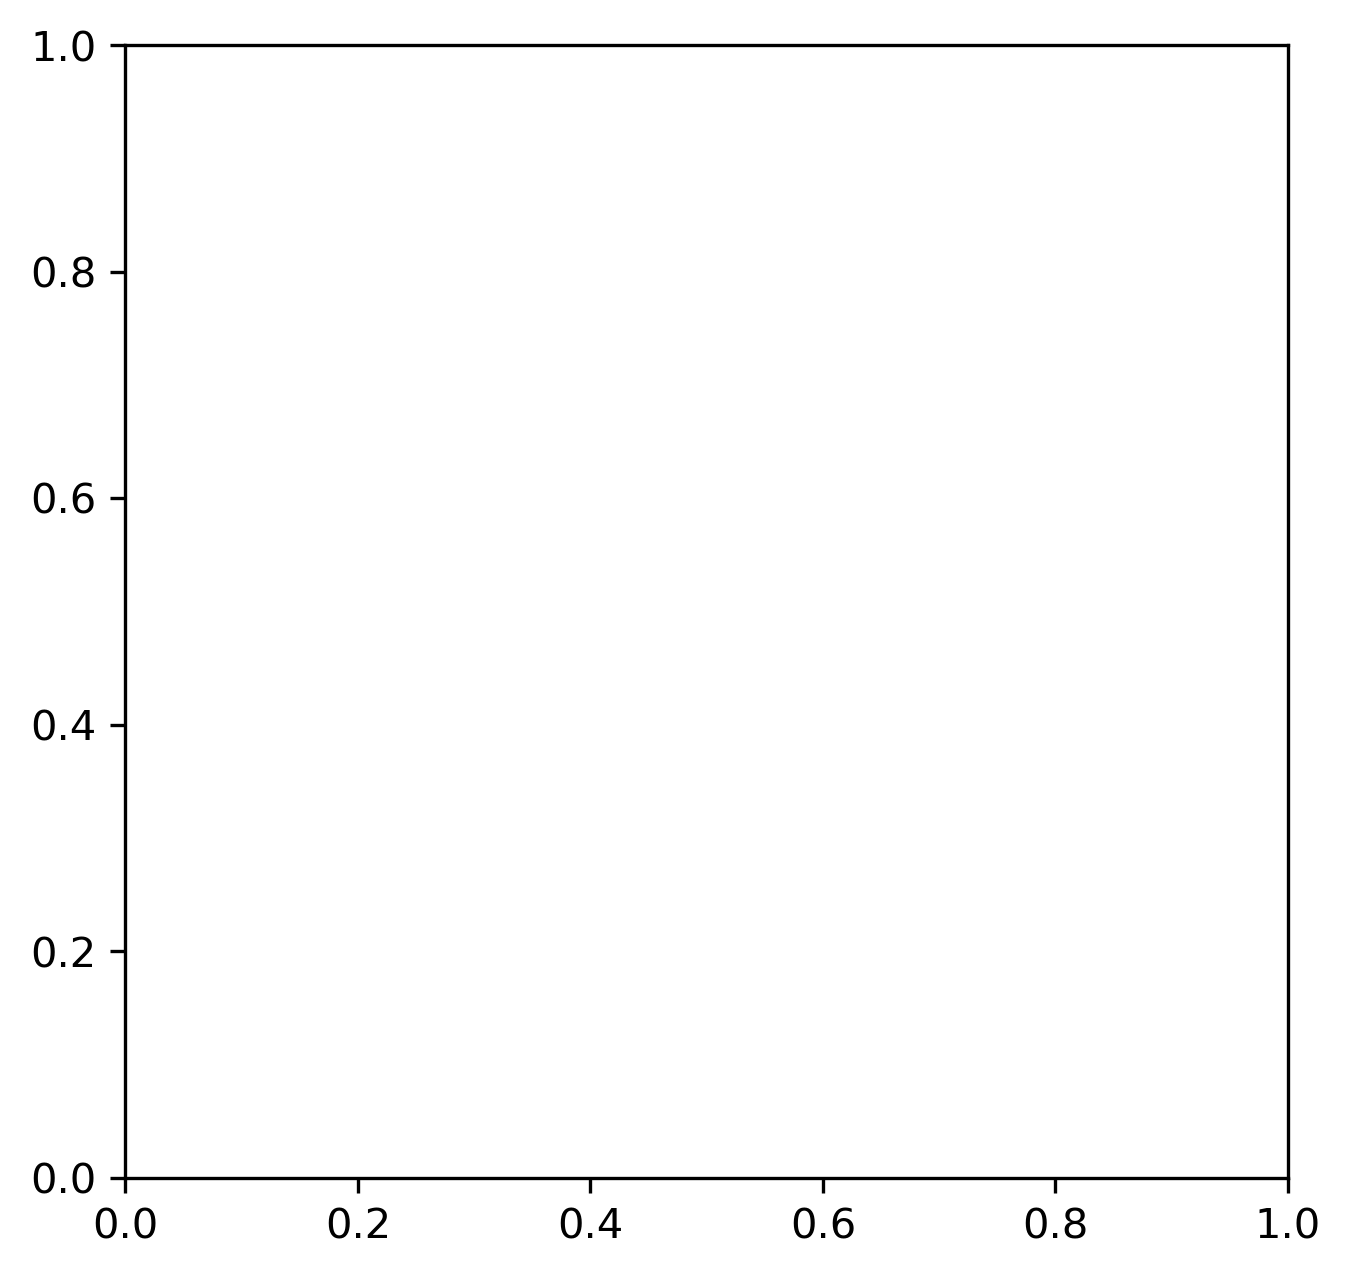

In [9]:

fig=plt.figure(dpi=300,figsize=(5,5))
ax = fig.add_subplot(1,1,1)
alllabels=["POT=1e+16","POT=1e+17","POT=1e+18"]
allcolors=["purple","blue","red"]
legend_handles=[]
curves=[]
FinalAll_s=FinalAll
for i in range(3):
    FinalAll_s[i]=gaussian_filter(FinalAll[i],sigma=0)
    co=ax.contour(M,logE,FinalAll_s[i],levels=[10],colors=allcolors[i])
    curves.append(co.allsegs)
    #curve=[]
    #print(co.allsegs)
    #for path in ax.collections[0].get_paths():
    #    curve.append(path.vertices)
    #curves.append(curve)
    legend_handles.append(Line2D([0], [0], color=allcolors[i], lw=2, label=alllabels[i]))
ax.legend(handles=legend_handles)
ax.set_xlim(0.01,10)
ax.set_xscale("log")
ax.set_xlabel("mass [GeV]")
ax.set_ylim(pow(10,-8),pow(10,-2))
ax.set_yscale("log")
ax.set_ylabel(r"$\epsilon$")
ax.set_title("No. of events >10, with efficiency")
fig.savefig("reach_curve_with_eff.pdf")

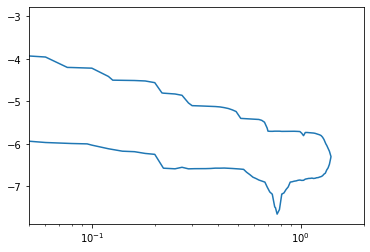

In [21]:
len(curves[0])
#curves[0][1]
#A=[row[0] for row in curves[0]]
#A
#curves[0]
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(curves[2][0][:,0],curves[2][0][:,1])
ax.set_xlim(0.05,2)
ax.set_xscale("log")
with open ("xinlong16.dat","w") as file:
    for p in curves[0][0]:
        file.write(f"{str(p[0])} {str(p[1])}\n")
with open ("xinlong17.dat","w") as file:
    for p in curves[1][0]:
        file.write(f"{str(p[0])} {str(p[1])}\n")
with open ("xinlong18.dat","w") as file:
    for p in curves[2][0]:
        file.write(f"{str(p[0])} {str(p[1])}\n")
with open ("test.dat","w") as file:
    for p in curves[2][0]:
        file.write(f"{str(p[0])} {str(p[1])}\n")
#A=[row[0] for row in curve[0][0]]
#plt.plot([row[0] for row in curves[0]],[row [1] for row in curves[0]])

In [11]:
POTs=[16,17,18]
for i in range(3):
    POT=POTs[i]
    with open (f"SeaQuestXinlonge{str(POT)}.dat","w") as file:
        for j in range(len(mass_vector)):
            mm=mass_vector[j]
            eps_lower=1000
            eps_upper=1000
            within=0
            for k in range(len(eps_vector)):
                Nevts=FinalAll[i][k,j]
                if within==0:
                    if Nevts>10:
                        within=1
                        eps_upper=pow(10,eps_vector[k])
                if within==1:
                    if Nevts<10:
                        within=0
                        eps_lower=pow(10,eps_vector[k])
                        break
            if eps_lower != 1000 and eps_upper !=1000:
                print(mm)
                print(eps_lower)
                print(eps_upper)
                file.write(f"{mm} {eps_lower} {eps_upper}\n")
                                             
                    
                
    

0.002
1.584893192461114e-05
0.001
0.003
1.584893192461114e-05
0.001
0.004
1.584893192461114e-05
0.001
0.005
7.943282347242822e-06
0.0005011872336272725
0.007
7.943282347242822e-06
0.0005011872336272725
0.01
7.943282347242822e-06
0.00025118864315095795
0.02
3.981071705534969e-06
0.00012589254117941674
0.04
3.981071705534969e-06
6.309573444801929e-05
0.06
3.981071705534969e-06
3.1622776601683795e-05
0.08
1.9952623149688787e-06
3.1622776601683795e-05
0.1
1.9952623149688787e-06
1.584893192461114e-05
0.12
1.9952623149688787e-06
1.584893192461114e-05
0.14
1.9952623149688787e-06
1.584893192461114e-05
0.16
1.9952623149688787e-06
7.943282347242822e-06
0.18
1.9952623149688787e-06
7.943282347242822e-06
0.2
1.9952623149688787e-06
7.943282347242822e-06
0.22
1.9952623149688787e-06
3.981071705534969e-06
0.73
2.5118864315095823e-07
5.011872336272725e-07
0.75
6.30957344480193e-08
1e-06
0.77
6.30957344480193e-08
1e-06
0.79
6.30957344480193e-08
1e-06
0.81
2.5118864315095823e-07
5.011872336272725e-07
0.83